In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import date
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import gaussian_kde
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [3]:
# Reading the dataset
file_path = '03. [DAZONE2024] DATASET.csv'
data = pd.read_csv(file_path)

In [4]:
data.describe()

,ID,Year_Of_Birth,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,...,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase
count,3069.000000,2832.000000,2782.000000,2804.000000,2807.000000,2810.000000,2806.000000,2813.000000,2840.000000,2792.000000,...,2815.000000,2801.000000,2834.000000,2826.000000,2813.000000,1.561000e+03,1.257000e+03,2084.000000,2100.000000,2833.000000
mean,5496.270446,1987.882768,52489.802301,48.917974,310.807268,28.201779,169.133286,37.570921,27.107746,44.102077,...,-0.641918,0.014638,0.066690,0.014508,0.009243,8.450269e+10,8.449625e+10,2022.020154,6.502381,14.976350
std,2600.610175,4.914424,24436.779418,29.081314,337.387542,39.777338,225.993668,54.811137,41.021721,52.125108,...,0.538184,0.120119,0.249529,0.119594,0.095711,2.831282e+08,2.821344e+08,0.686316,3.485558,7.617011
min,1001.000000,1975.000000,1730.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.400005e+10,8.400247e+10,2021.000000,1.000000,0.000000
25%,3251.000000,1985.000000,35790.250000,24.000000,27.000000,3.000000,16.000000,3.000000,1.000000,9.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.425969e+10,8.425343e+10,2022.000000,3.000000,8.000000
50%,5555.000000,1988.000000,51844.500000,49.000000,184.000000,10.000000,69.000000,12.000000,9.000000,24.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.450524e+10,8.450120e+10,2022.000000,6.000000,15.000000
75%,7753.000000,1991.000000,68592.000000,74.000000,512.000000,34.000000,238.750000,49.000000,34.000000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.474783e+10,8.473833e+10,2022.000000,10.000000,21.000000
max,9997.000000,2002.000000,666666.000000,99.000000,1494.000000,201.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,8.499889e+10,8.499750e+10,2023.000000,12.000000,44.000000


In [5]:
# Data Information
print("Dataset Shape:", data.shape)
print("Column Information:")
data.info()

Dataset Shape: (3069, 31)
Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3069 non-null   int64  
 1   Year_Of_Birth          2832 non-null   float64
 2   Academic_Level         2799 non-null   object 
 3   Income                 2782 non-null   float64
 4   Registration_Time      2824 non-null   object 
 5   Recency                2804 non-null   float64
 6   Liquor                 2807 non-null   float64
 7   Vegetables             2810 non-null   float64
 8   Pork                   2806 non-null   float64
 9   Seafood                2813 non-null   float64
 10  Candy                  2840 non-null   float64
 11  Jewellery              2792 non-null   float64
 12  Num_Deals_Purchases    2841 non-null   float64
 13  Num_Web_Purchases      2823 non-null   float64
 14  Num_Catalo

In [6]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:\n",missing_values)

Missing Values per Column:
 ID                          0
Year_Of_Birth             237
Academic_Level            270
Income                    287
Registration_Time         245
Recency                   265
Liquor                    262
Vegetables                259
Pork                      263
Seafood                   256
Candy                     229
Jewellery                 277
Num_Deals_Purchases       228
Num_Web_Purchases         246
Num_Catalog_Purchases     258
Num_Store_Purchases       243
Num_Web_Visits_Month      270
Promo_30                  243
Promo_40                  254
Promo_50                  268
Promo_10                  235
Promo_20                  243
Complain                  256
Gender                    275
Phone                    1508
Phone_Number             1812
Year_Register             985
Month_Register            969
Total_Purchase            236
Living_With               248
Payment_Method            799
dtype: int64


In [7]:
# Checking for duplicates
print("Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicate Rows: 0


In [8]:
unique_id_count = data['ID'].nunique()
print("Number of unique IDs:", unique_id_count)

Number of unique IDs: 2240


In [9]:
data

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,6815,1982.0,PhD,30396.0,30-04-2023,22.0,16.0,2.0,6.0,0.0,...,0.0,0.0,Male,NaN,8.416733e+10,2023.0,4.0,6.0,Married_1,Cash
1,2567,NaN,NaN,83532.0,26-09-2022,36.0,756.0,NaN,562.0,NaN,...,0.0,0.0,Other,8.431989e+10,NaN,NaN,NaN,15.0,Together_0,NaN
2,6053,1982.0,PhD,68682.0,06-10-2022,56.0,920.0,2.0,505.0,99.0,...,0.0,0.0,Male,8.490853e+10,NaN,2022.0,10.0,24.0,Together_0,Cash
3,1985,2002.0,PhD,63516.0,06-07-2022,30.0,142.0,13.0,114.0,15.0,...,0.0,0.0,Female,8.404168e+10,NaN,2022.0,7.0,16.0,Together_2,Online
4,6860,NaN,PhD,51650.0,11-05-2023,NaN,153.0,5.0,22.0,2.0,...,0.0,0.0,NaN,8.491216e+10,NaN,2023.0,NaN,10.0,Married_1,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2801,1990.0,Basic,20425.0,29-10-2021,5.0,5.0,14.0,5.0,3.0,...,0.0,0.0,Other,8.414996e+10,NaN,2021.0,10.0,7.0,Married_1,Online
3065,8551,1990.0,PhD,65295.0,23-12-2022,19.0,366.0,34.0,117.0,34.0,...,0.0,0.0,Female,NaN,8.409877e+10,2022.0,12.0,20.0,Single_0,Cash
3066,7831,1998.0,Graduation,31632.0,14-07-2022,92.0,18.0,10.0,12.0,11.0,...,0.0,0.0,Female,8.431896e+10,NaN,2022.0,7.0,6.0,Single_0,NaN
3067,6426,1994.0,Master,61794.0,14-09-2022,74.0,265.0,49.0,188.0,54.0,...,0.0,0.0,Male,8.452917e+10,NaN,2022.0,NaN,20.0,Married_1,Mobile


**Data Preprocessing**

In [10]:
data = data.sort_values('ID')

In [11]:
data = data.groupby('ID').apply(lambda x: x.ffill().bfill()).drop_duplicates()

In [12]:
data.reset_index(level=1, drop=True, inplace=True)

There are some unneccesary columns: ID, Phone, Phone_Number, Year_Register, Month_Register

In [13]:
data = data.drop(['Phone', 'Phone_Number', 'Month_Register', 'Year_Register'], axis=1)


In [14]:
data = data.dropna(subset=['Income'])

In [15]:
data['Payment_Method'] = data['Payment_Method'].fillna('Not provided')

In [16]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:\n",missing_values)

Missing Values per Column:
 ID                       0
Year_Of_Birth            0
Academic_Level           0
Income                   0
Registration_Time        0
Recency                  0
Liquor                   0
Vegetables               0
Pork                     0
Seafood                  0
Candy                    0
Jewellery                0
Num_Deals_Purchases      0
Num_Web_Purchases        0
Num_Catalog_Purchases    0
Num_Store_Purchases      0
Num_Web_Visits_Month     0
Promo_30                 0
Promo_40                 0
Promo_50                 0
Promo_10                 0
Promo_20                 0
Complain                 0
Gender                   0
Total_Purchase           0
Living_With              0
Payment_Method           0
dtype: int64


In [17]:
data.loc[data['Promo_40'] == -1, 'Promo_40'] = 1
data['Promo_40'].value_counts()
 # Do the same with
 # data['Promo_10'].value_counts()
 # data['Promo_20'].value_counts()
 # data['Promo_30'].value_counts()
 # data['Promo_50'].value_counts()

,count
Promo_40,
1.0,1544
0.0,672


In [18]:
data = data.drop(data[data['Total_Purchase'] == 0].index)

In [19]:
# Calculate age based on Year_Of_Birth
data['Age'] = date.today().year - data['Year_Of_Birth']
data = data.drop('Year_Of_Birth', axis=1)


In [20]:
data['Relationship_Status'] = data['Living_With'].str[:-2]
data['Num_Of_Child'] = data['Living_With'].str[-1:].astype(int)
data = data.drop('Living_With', axis=1)

In [21]:
maximum_age = data['Age'].max()
minimum_age = data['Age'].min()

print("Maximum Age:", maximum_age)
print("Minimum Age:", minimum_age)

Maximum Age: 50.0
Minimum Age: 23.0


In [22]:
#Create Age groups
data['Age_Group'] = data['Age'].apply(lambda x: '23-30' if 23 <= x <= 30 else
                                      ('30-40' if 30 < x <= 40 else
                                       ('40-50' if 40 < x <= 50 else 'Outside_23_50')))

In [23]:
maximum_income = data['Income'].max()
minimum_income = data['Income'].min()

print("Maximum Income:", maximum_income)
print("Minimum Income:", minimum_income)

Maximum Income: 666666.0
Minimum Income: 1730.0


In [24]:
data = data.drop(data[data['Income'] > 200000].index)

In [25]:
data['Age'] = data['Age'].astype(int)
data['Academic_Level'] = data['Academic_Level'].astype('category')
data['Promo_30'] = data['Promo_30'].astype('category')
data['Promo_40'] = data['Promo_40'].astype('category')
data['Promo_50'] = data['Promo_50'].astype('category')
data['Promo_10'] = data['Promo_10'].astype('category')
data['Promo_20'] = data['Promo_20'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Payment_Method'] = data['Payment_Method'].astype('category')
data['Relationship_Status'] = data['Relationship_Status'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')
# Convert 'Registration_Time' to datetime
data['Registration_Time'] = pd.to_datetime(data['Registration_Time'])

<ipython-input-25-9e640827251d>:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Registration_Time'] = pd.to_datetime(data['Registration_Time'])


In [26]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, 1001 to 9997
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2211 non-null   int64         
 1   Academic_Level         2211 non-null   category      
 2   Income                 2211 non-null   float64       
 3   Registration_Time      2211 non-null   datetime64[ns]
 4   Recency                2211 non-null   float64       
 5   Liquor                 2211 non-null   float64       
 6   Vegetables             2211 non-null   float64       
 7   Pork                   2211 non-null   float64       
 8   Seafood                2211 non-null   float64       
 9   Candy                  2211 non-null   float64       
 10  Jewellery              2211 non-null   float64       
 11  Num_Deals_Purchases    2211 non-null   float64       
 12  Num_Web_Purchases      2211 non-null   float64       
 13  Num_C

**Data Analysis**

In [27]:
fig = go.Figure()
fig.update_layout(
    width=600,
    height=800,
    font_size=15
)

fig.add_trace(go.Histogram(
    x=data['Age'],
    nbinsx=28,
    marker_color='skyblue',
    name='Age Distribution'
))
age_values = data['Age'].dropna()
kde = gaussian_kde(age_values)
x_range = np.linspace(age_values.min(), age_values.max(), 1000)
kde_values = kde(x_range)

fig.add_trace(go.Scatter(
    x=x_range,
    y=kde_values * len(age_values) * (age_values.max() - age_values.min()) / 28,
    mode='lines',
    line=dict(color='red', width=2),
    name='Age KDE'
))

fig.update_layout(
    title='Age Distribution',
    xaxis_title='Age',
    yaxis_title='Count',
    bargap=0.1
)

fig.show()

In [28]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

fig = go.Figure()
fig.update_layout(
    width=600,
    height=800,
    font_size=15
)

fig.add_trace(go.Histogram(
    x=data['Income'],
    nbinsx=30,
    marker_color='skyblue',
    name='Income Distribution'
))

income_values = data['Income'].dropna()
kde = gaussian_kde(income_values)
x_range = np.linspace(income_values.min(), income_values.max(), 1000)
kde_values = kde(x_range)

fig.add_trace(go.Scatter(
    x=x_range,
    y=kde_values * len(income_values) * (income_values.max() - income_values.min()) / 30,
    mode='lines',
    line=dict(color='red', width=2),
    name='Income KDE'
))

fig.update_layout(
    title='Income Distribution',
    xaxis_title='Income',
    yaxis_title='Count',
    bargap=0.1
)

fig.show()

In [29]:
import pandas as pd
import plotly.graph_objects as go

# Define age groups
age_labels = ['23-30', '30-40', '40-50']

# Group by age group and calculate the total purchase
age_group_purchase_data = data.groupby('Age_Group')['Total_Purchase'].sum()

top_age_groups = age_group_purchase_data

# Create data for pie chart
pie_data = pd.concat([top_age_groups, pd.Series([age_group_purchase_data.sum() - top_age_groups.sum()], index=['Rest'])])

# Create pie chart
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=pie_data.index,
    values=pie_data,
    textinfo='percent',
    textposition='inside',
    insidetextorientation='horizontal',
    hoverinfo='label+percent+value',
))

fig.update_layout(title="Total Purchase by Age Group", legend_title="Age Group")

fig.show()


In [30]:
# Define the product categories
product_categories = ['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']

# Calculate Total_Spending by summing across product categories
data['Total_Spending'] = data[product_categories].sum(axis=1)

# Group by Age_Group and calculate the total spending
age_group_spending_data = data.groupby('Age_Group')['Total_Spending'].sum()

# Create data for pie chart
pie_data = pd.concat([age_group_spending_data, pd.Series([age_group_spending_data.sum() - age_group_spending_data.sum()], index=['Rest'])])

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=pie_data.index, values=pie_data)])

fig.update_layout(title="Total Spending by Age Group", legend_title="Age Group")
fig.show()


In [31]:
# Create pie chart for Total_Spending by Gender
gender_spending_data = data.groupby('Gender')['Total_Spending'].sum()

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=gender_spending_data.index, values=gender_spending_data)])
fig.update_layout(title="Total Spending by Gender")
fig.show()

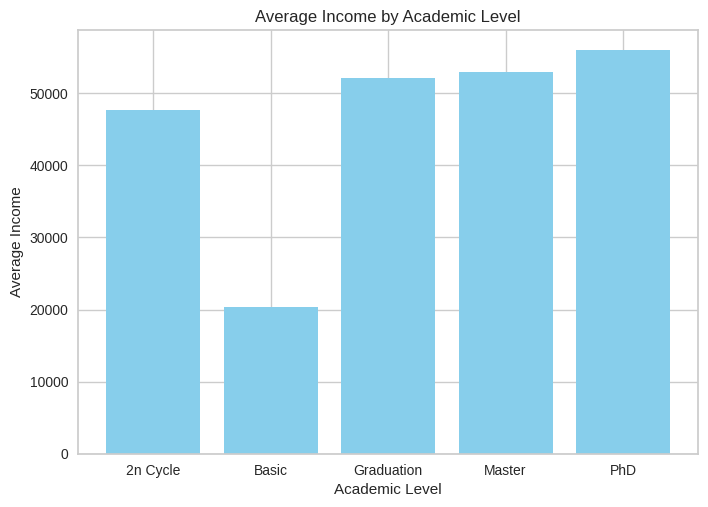

In [32]:
average_income_by_academic_level = data.groupby('Academic_Level')['Income'].mean()

plt.bar(average_income_by_academic_level.index, average_income_by_academic_level.values, color = 'skyblue')
plt.xlabel('Academic Level')
plt.ylabel('Average Income')
plt.title('Average Income by Academic Level')
plt.show()

In [33]:
# Sum of spending by academic level
total_spend_aca_data = pd.DataFrame()
for category in product_categories:
    temp = data.groupby('Academic_Level')[category].sum() # Calculate total spending for each category
    if total_spend_aca_data.empty:
        total_spend_aca_data = temp.to_frame()
    else:
        total_spend_aca_data = pd.concat([total_spend_aca_data, temp.to_frame()], axis=1)

total_spend_aca_data['Total_Spending'] = total_spend_aca_data.sum(axis=1)

fig = go.Figure()

fig.add_trace(go.Pie(
    labels=total_spend_aca_data.index,
    values=total_spend_aca_data['Total_Spending'],
    textinfo='value+percent+label',
    textposition='inside',
    insidetextorientation='horizontal',
    hoverinfo='label+percent+value'
))

fig.update_layout(title="Total Spending by Academic Level", legend_title='Academic Level')

fig.show()

In [34]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Define the product categories
product_categories = ['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']

# Create a combined category of Relationship_Status and Num_Of_Child
data['Relationship_Child_Group'] = data['Relationship_Status'].astype(str) + ' - ' + data['Num_Of_Child'].astype(str) + ' Kids'

# Group by Relationship_Status and Num_Of_Child and count the occurrences
count_data = data.groupby(['Relationship_Status', 'Num_Of_Child']).size().unstack(fill_value=0)

# Sort the data by total counts in descending order
total_counts = count_data.sum(axis=1)
count_data = count_data.loc[total_counts.sort_values(ascending=False).index]

# Get a color palette
colors = px.colors.qualitative.Pastel1  # You can use other color palettes here

# Create stacked bar chart
fig = go.Figure()

# Add bars for each Relationship_Status
for idx, marriage_status in enumerate(count_data.columns):
    fig.add_trace(go.Bar(
        x=count_data.index,
        y=count_data[marriage_status],
        name=str(marriage_status),
        marker=dict(color=colors[idx % len(colors)])  # Assign color to each group
    ))

# Update layout to make it look better
fig.update_layout(
    title="Count of People by Relationship Status and Number of Children",
    xaxis_title="Number of Children",
    yaxis_title="Count of People",
    barmode='stack',
    legend_title="Marriage Status",
    template="plotly",
    plot_bgcolor='white'
)

fig.show()


In [35]:
data['Relationship_Child_Group'] = data['Relationship_Status'].astype(str) + ' - ' + data['Num_Of_Child'].astype(str) + ' Kids'

# Group by the combined category and calculate the total spending
combined_spending_data = data.groupby('Relationship_Child_Group')['Total_Spending'].sum()

# Get the top 5 categories
top_5_spending_data = combined_spending_data.nlargest(5)

# Combine the rest into a single "Rest" category
rest_spending_data = pd.Series([combined_spending_data.sum() - top_5_spending_data.sum()], index=['Rest'])
pie_data = pd.concat([top_5_spending_data, rest_spending_data])

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=pie_data.index, values=pie_data)])

fig.update_layout(title="Total Spending by Relationship Status and Number of Children", legend_title="Relationship Status & Children")
fig.show()


**Trend Analysis**

In [36]:

# Group by Payment_Method and calculate the total purchase
payment_purchase_data = data.groupby('Payment_Method')['Total_Purchase'].sum()

pie_data = pd.concat([payment_purchase_data])

# Create pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=pie_data.index, values=pie_data)])

fig.update_layout(title="Total Purchase by Payment Method", legend_title="Payment Method")
fig.show()

In [37]:
import pandas as pd
import plotly.graph_objects as go

# Group by Payment_Method and calculate the total purchase
payment_purchase_data = data.groupby('Payment_Method')['Total_Spending'].sum()

pie_data = pd.concat([payment_purchase_data])

# Create pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=pie_data.index, values=pie_data)])

fig.update_layout(title="Total Spending by Payment Method", legend_title="Payment Method")
fig.show()

In [38]:
products = pd.DataFrame({
    'Candy': [sum(data['Candy'])],
    'Jewellery': [sum(data['Candy'])],
    'Vegetables': [sum(data['Vegetables'])],
    'Seafood': [sum(data['Seafood'])],
    'Pork': [sum(data['Pork'])],
    'Liquor': [sum(data['Liquor'])]
}, index=['Total'])

columns = products.columns
values = products.values[0]

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=columns,
    values=values,
    hoverinfo='label+percent',
    textinfo='label+percent+value',
)])

# Customize the layout
fig.update_layout(
    title_text='Shop by Product',
    legend_title='Product',
)

# Show and save the plot

fig.show()

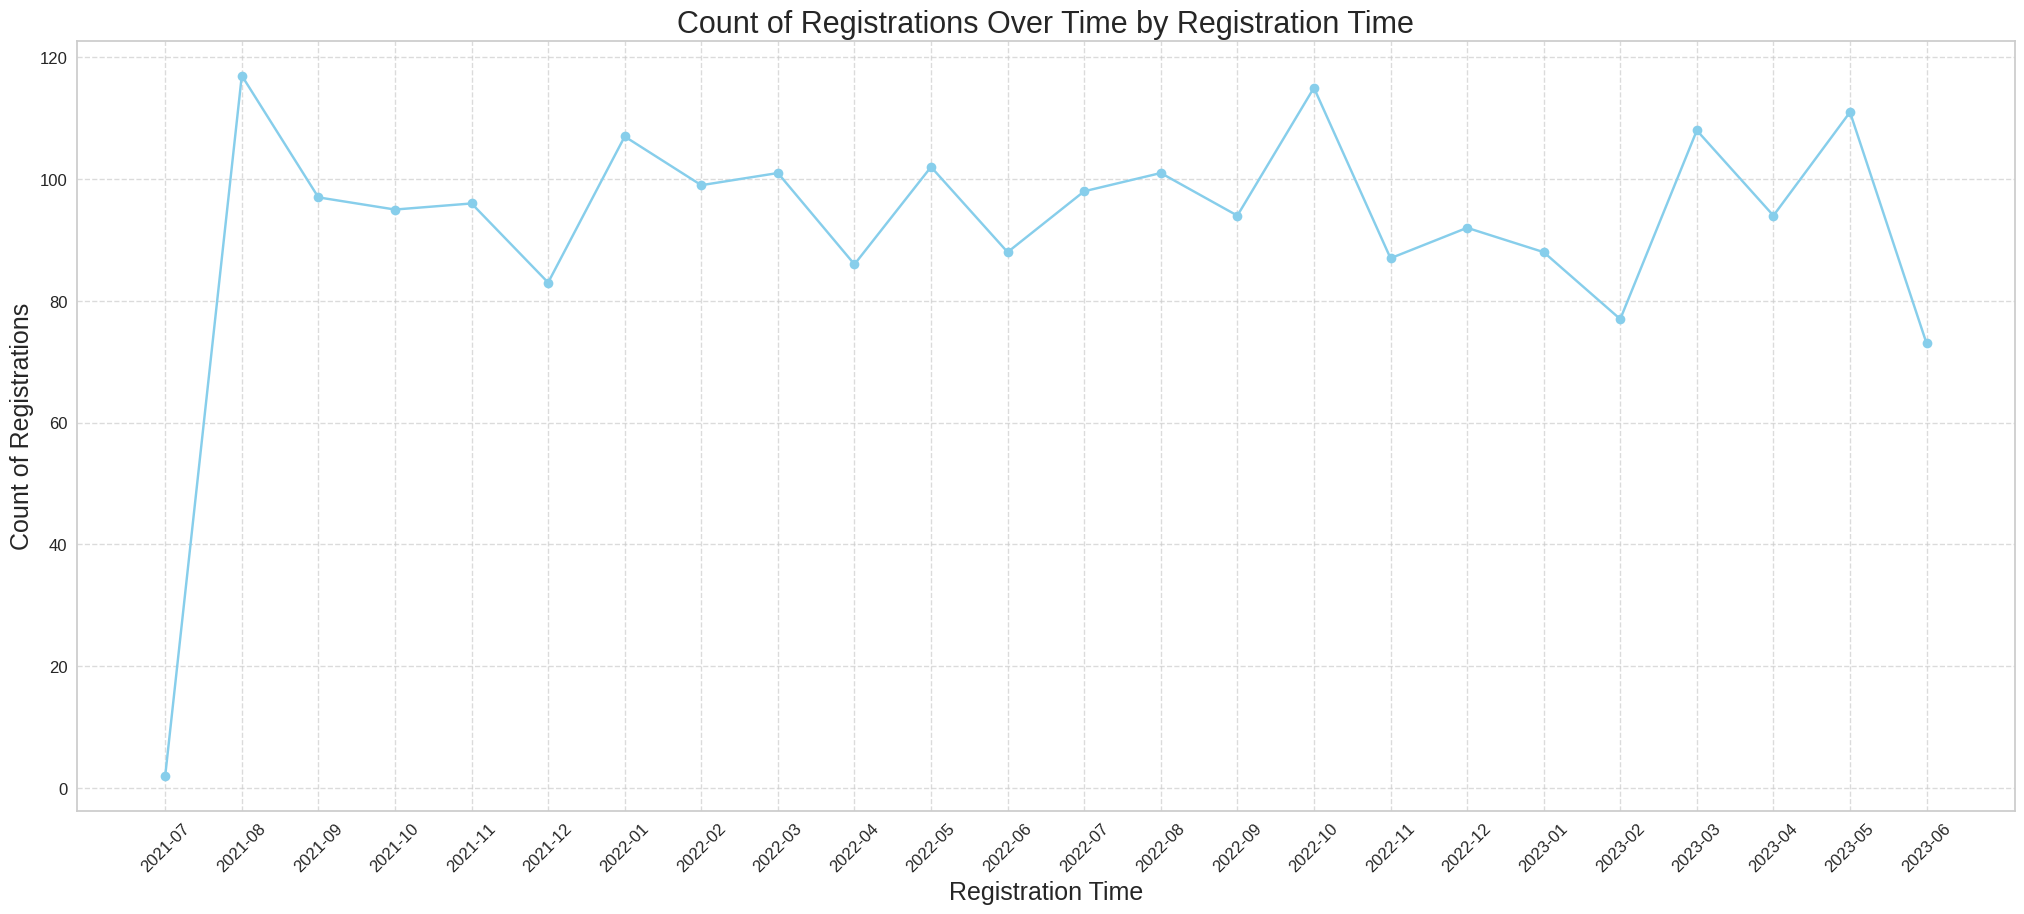

In [39]:
data = data.sort_values('Registration_Time')

# Count the number of rows (using index) per registration time
registration_count = data.groupby(data['Registration_Time'].dt.strftime('%Y-%m')).size()

# Plotting the line chart
plt.figure(figsize=(25, 10))
plt.plot(registration_count.index, registration_count.values, marker='o', linestyle='-', color = 'skyblue')

plt.xlabel('Registration Time', fontsize=18)
plt.ylabel('Count of Registrations', fontsize=18)
plt.title('Count of Registrations Over Time by Registration Time', fontsize=22)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


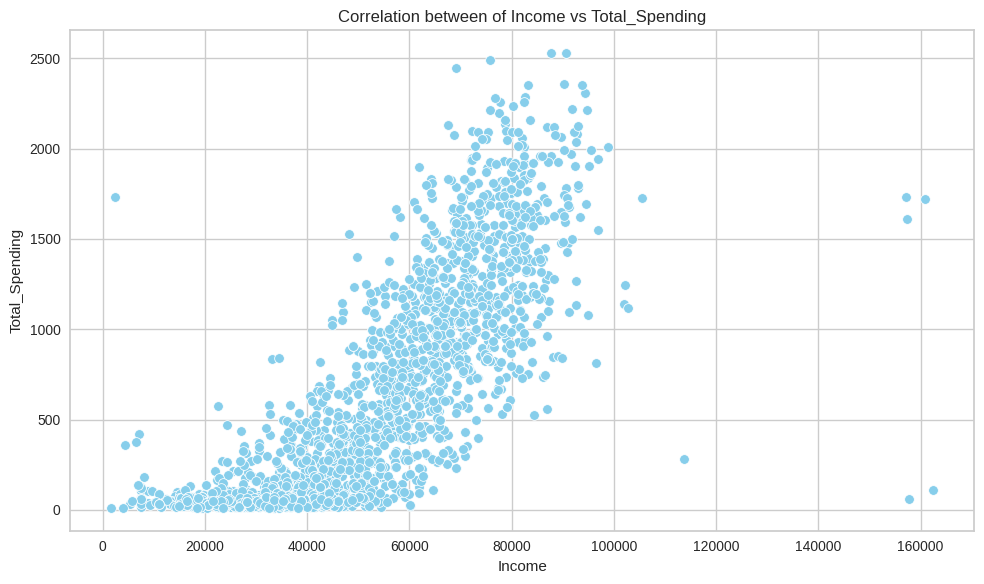

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='Total_Spending', color='skyblue')
plt.title('Correlation between of Income vs Total_Spending')
plt.xlabel('Income')
plt.ylabel('Total_Spending')
plt.tight_layout()
plt.show()

In [41]:
promos = pd.DataFrame({
    'Promo_10': [sum(data['Promo_10'].astype(int))/len(data)],
    'Promo_20': [sum(data['Promo_20'].astype(int))/len(data)],
    'Promo_30': [sum(data['Promo_30'].astype(int))/len(data)],
    'Promo_40': [sum(data['Promo_40'].astype(int))/len(data)],
    'Promo_50': [sum(data['Promo_50'].astype(int))/len(data)],
}, index=['Total'])

columns = promos.columns
values = promos.values[0]
# Create the horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=values,
    y=columns,
    orientation='h',
    marker=dict(color=colors)
))

# Customize the layout
fig.update_layout(
    title='Promo Totals',
    xaxis_title='Total',
    yaxis_title='Promo',
    plot_bgcolor='#f5f5f5',
    font=dict(size=25),
    width=800,
    height=600
)

# Show and save the plot

fig.show()

In [42]:
num_deal_purchase_count = len(data[data['Num_Deals_Purchases'] != 0])
num_deal_purchase_count / len(data)

0.9819086386250565

In [43]:
num_web_visit_count = len(data[data['Num_Web_Visits_Month'] != 0])
num_web_visit_count / len(data)

0.9963817277250113

In [44]:
complain_count = len(data[data['Complain'] == 1])
complain_count / len(data)

0.009497964721845319

In [45]:
complain_data = data[data['Complain'] == 1]

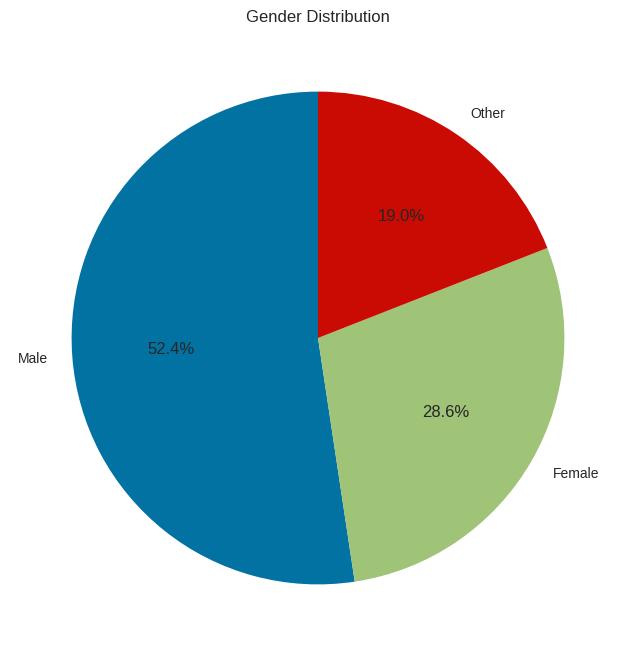

In [46]:
gender_count = complain_data['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title('Gender Distribution')
plt.show()


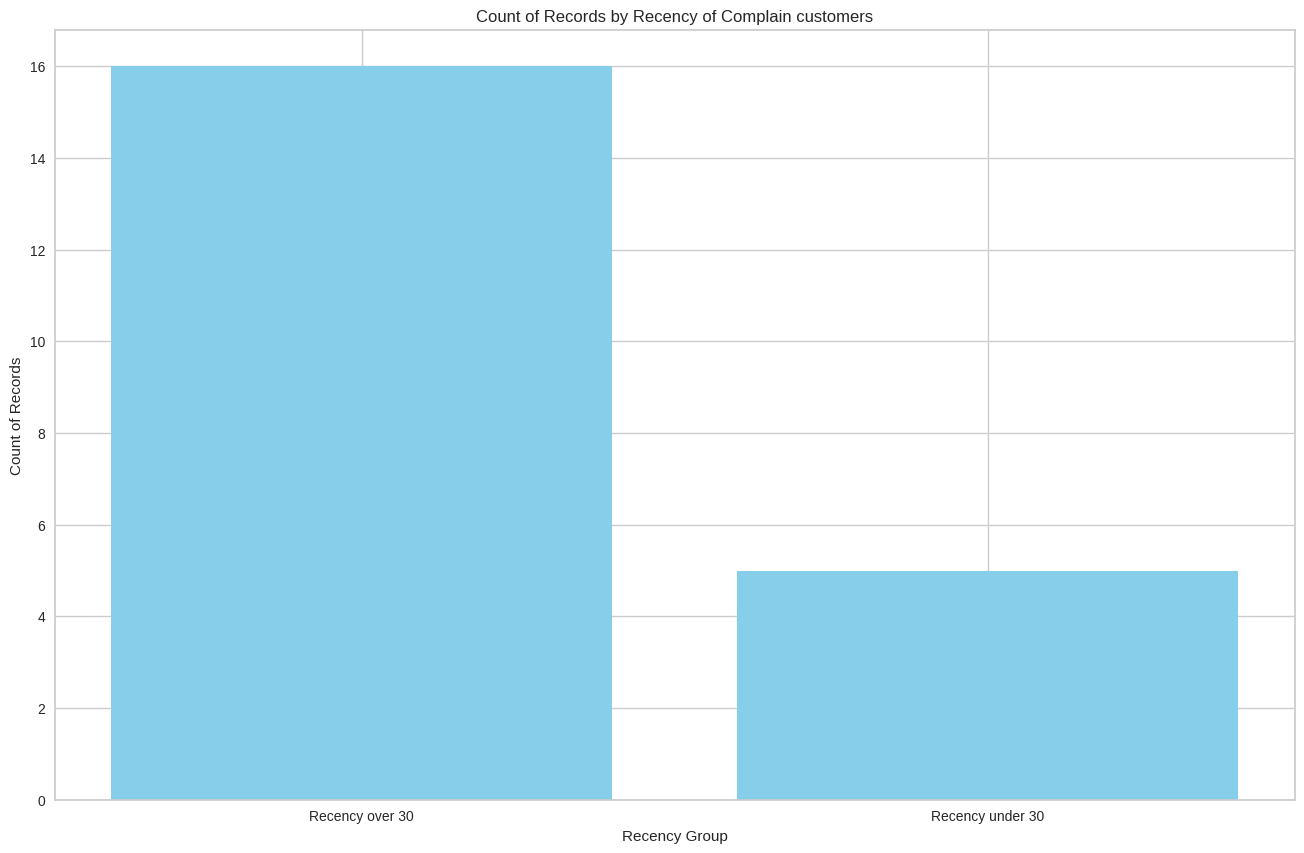

In [47]:
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['font.size'] = 15

recency_higher = complain_data[complain_data['Recency'] > 30]
recency_lower = complain_data[complain_data['Recency'] <= 30]

counts = [recency_higher.shape[0], recency_lower.shape[0]]
labels = ['Recency over 30', 'Recency under 30']

plt.bar(labels, counts, color = 'skyblue')
plt.title('Count of Records by Recency of Complain customers')
plt.xlabel('Recency Group')
plt.ylabel('Count of Records')

plt.title('Count of Records by Recency of Complain customers')
plt.xlabel('Recency Group')
plt.ylabel('Count of Records')

plt.show()

In [48]:
CURRENT_DAY = pd.to_datetime('today')
complain_data['latest_day'] = CURRENT_DAY - pd.to_timedelta(complain_data['Recency'], unit='d')
complain_data['month_attached'] = (complain_data['latest_day'] - complain_data['Registration_Time']) / pd.Timedelta(days=30)
complain_data['month_attached'] = complain_data['month_attached'].astype(int)

<ipython-input-48-056deaa944ad>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-056deaa944ad>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-056deaa944ad>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-49-0d9706397dbe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



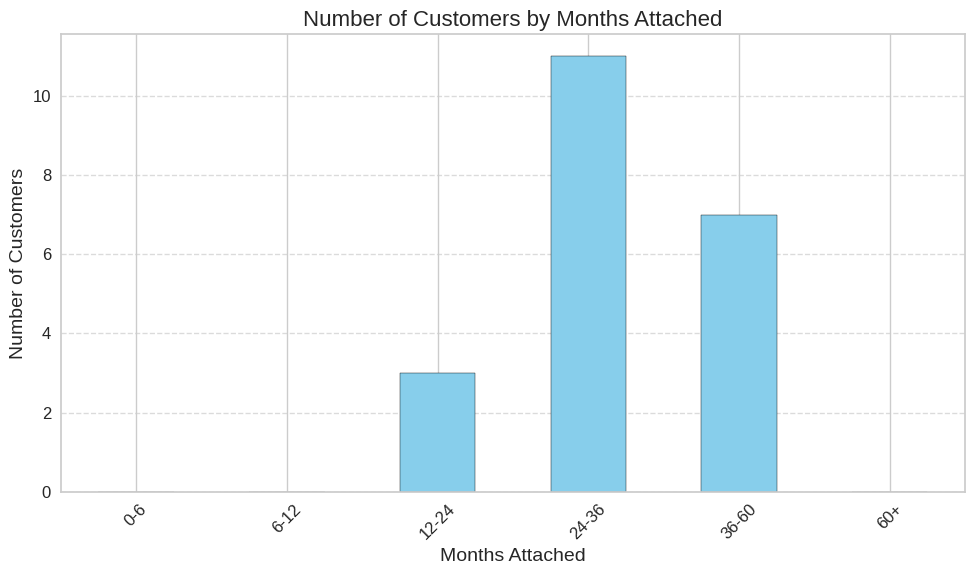

In [49]:
# Create bins for months attached (e.g., 0-6, 6-12, etc.)
complain_data['attached_category'] = pd.cut(
    complain_data['month_attached'],
    bins=[0, 6, 12, 24, 36, 60, float('inf')],
    labels=['0-6', '6-12', '12-24', '24-36', '36-60', '60+'],
    right=False
)

attached_counts = complain_data['attached_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
attached_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers by Months Attached', fontsize=16)
plt.xlabel('Months Attached', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Data Modelling**

RFM model


In [50]:
rfm_data = pd.DataFrame({
    'ID': data['ID'],
    'Recency': data['Recency'],
    'Frequency': data['Total_Purchase'],
    'Monetary': data['Total_Spending']
})

rfm_data

,ID,Recency,Frequency,Monetary
ID,,,,
1575,1575,72.0,18.0,421.0
8847,8847,36.0,27.0,942.0
2439,2439,66.0,19.0,1913.0
3685,3685,61.0,22.0,1531.0
9323,9323,19.0,12.0,74.0
...,...,...,...,...
2711,2711,98.0,23.0,770.0
4845,4845,72.0,14.0,917.0
7850,7850,72.0,16.0,987.0


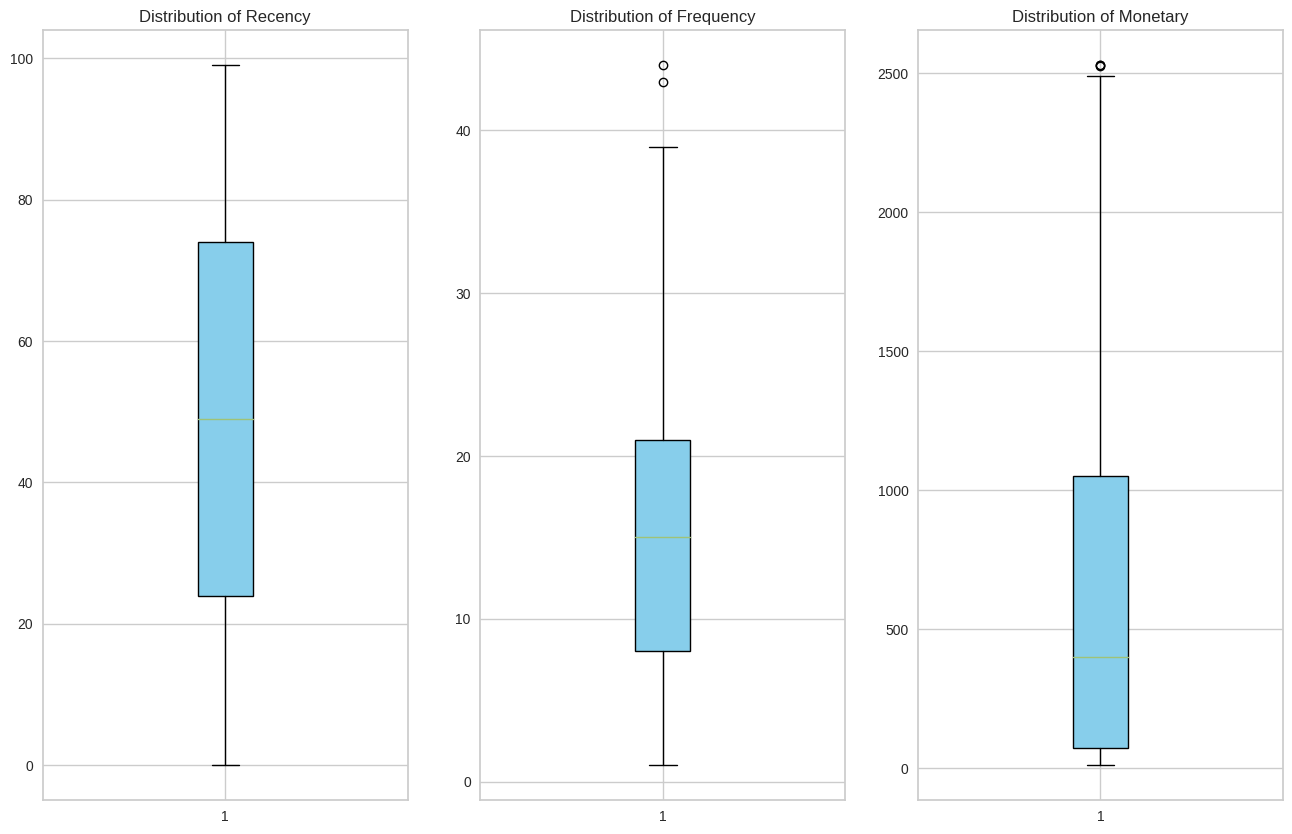

In [51]:
features = ['Recency', 'Frequency', 'Monetary']

def plotBoxplot(feats, df):
    fig, axs = plt.subplots(1, 3)
    i = 0
    for i in range(3):
        plt.rcParams['figure.figsize'] = [18, 10]
        box = axs[i].boxplot(df[feats[i]], patch_artist=True)
        for patch in box['boxes']:
            patch.set_facecolor('skyblue')  # Set color to skyblue
        axs[i].set_title('Distribution of ' + feats[i])
        i += 1
    plt.show()

plotBoxplot(features, rfm_data)


=> There are some outliers

In [52]:
features = ['Recency', 'Frequency', 'Monetary']

def find_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_ids = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]['ID'].tolist()
        outliers[feature] = outlier_ids
    return outliers

# Find all outliers
outliers = find_outliers(rfm_data, features)

outlier_ids = set()
for feature in features:
    outlier_ids.update(outliers[feature])

# Print outliers ID
for feature in features:
    print(f"Outliers for {feature}: {outliers[feature]}")

Outliers for Recency: []
Outliers for Frequency: [8473, 9560]
Outliers for Monetary: [8237, 8961, 1950]


In [53]:
rfm_data = rfm_data[~rfm_data['ID'].isin(outlier_ids)]
data = data[~data['ID'].isin(outlier_ids)]

print("Data without outliers:")
print(rfm_data)

Data without outliers:
        ID  Recency  Frequency  Monetary
ID                                      
1575  1575     72.0       18.0     421.0
8847  8847     36.0       27.0     942.0
2439  2439     66.0       19.0    1913.0
3685  3685     61.0       22.0    1531.0
9323  9323     19.0       12.0      74.0
...    ...      ...        ...       ...
2711  2711     98.0       23.0     770.0
4845  4845     72.0       14.0     917.0
7850  7850     72.0       16.0     987.0
9302  9302     50.0       19.0     538.0
8666  8666      1.0        7.0      48.0

[2206 rows x 4 columns]


<ipython-input-54-600edce3f154>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-54-600edce3f154>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-54-600edce3f154>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

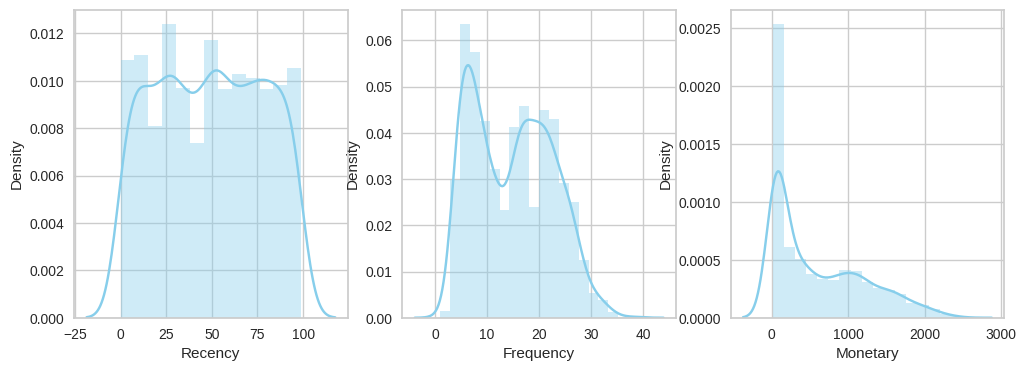

In [54]:
#check if data is skewed
fig, ax = plt.subplots (1, 3, figsize=(12,4))
sns.distplot(rfm_data['Recency'], ax = ax[0], color='skyblue')
sns.distplot(rfm_data['Frequency'], ax = ax[1], color='skyblue')
sns.distplot(rfm_data['Monetary'], ax = ax[2], color='skyblue')
plt.show()

=> Except for Recency col, the Frequency col and Monetary has right-skewed distribution. Next, I implement Box-Cox

In [55]:
rfm_data_transform = pd.DataFrame()
rfm_data_transform['Frequency'] = pd.Series(stats.boxcox(rfm_data['Frequency'])[0]).reset_index(drop=True)
rfm_data_transform['Monetary'] = pd.Series(np.cbrt(rfm_data['Monetary'])).reset_index(drop=True)
rfm_data_transform['Recency'] = rfm_data['Recency'].reset_index(drop=True)

Scale data with StandardScaler

In [56]:
scaler = StandardScaler()
scaler.fit(rfm_data_transform)

rfm_data_transform = scaler.transform(rfm_data_transform)

**KMeans**

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will 

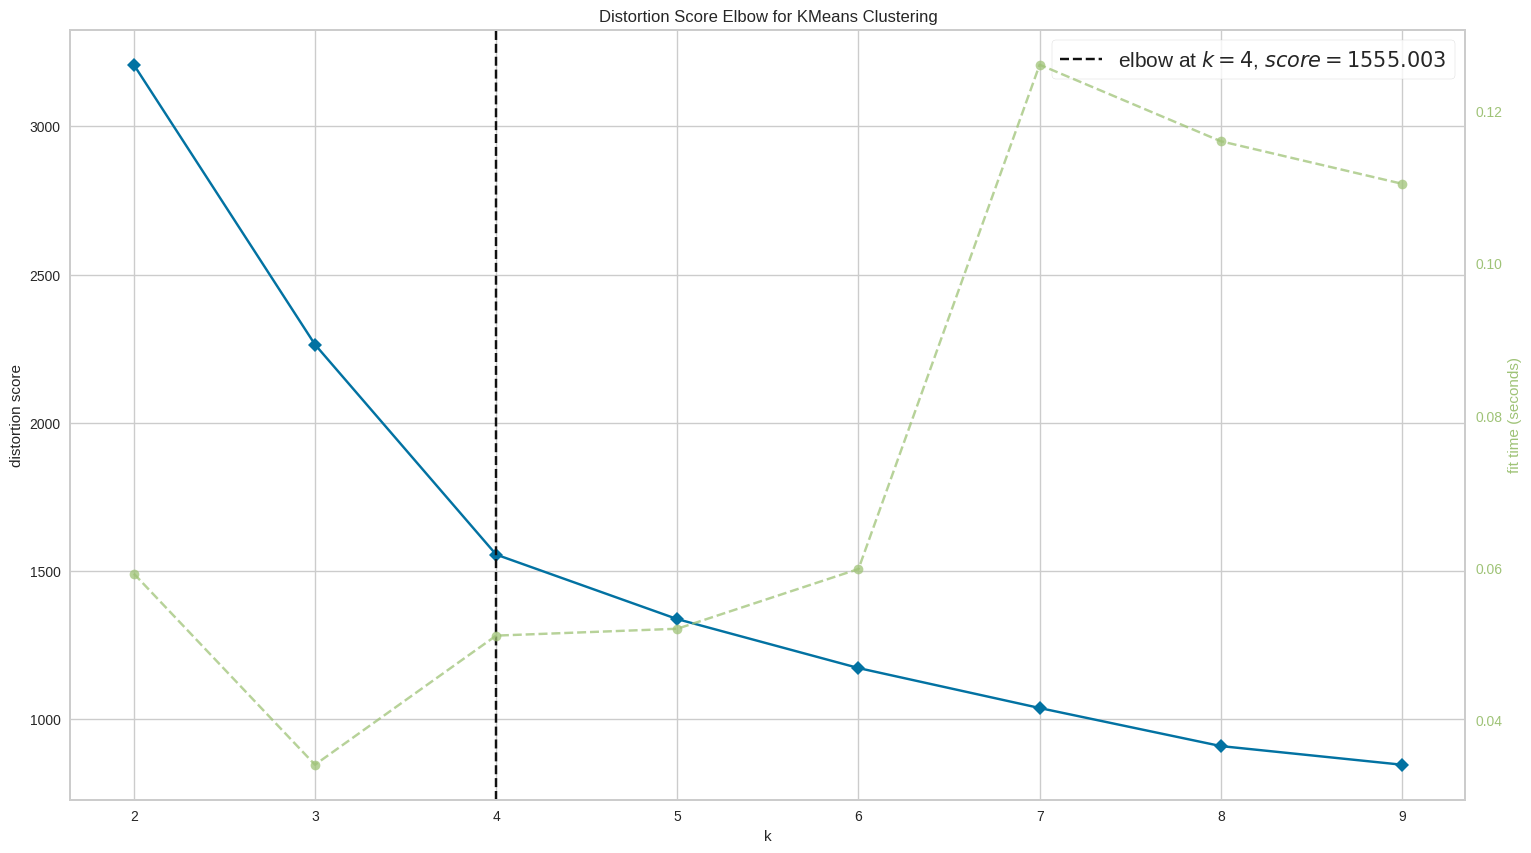

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
k_means = KMeans(random_state=42)
elbow = KElbowVisualizer(k_means, k=(2, 10))
elbow.fit(rfm_data_transform)
elbow.show()

We can see k=4 is the optimal value


In [58]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm_data_transform)
rfm_data['Cluster_KMeans'] = model.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-58-fb01d7385f65>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
rfm_data.groupby('Cluster_KMeans').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_KMeans':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_KMeans
Cluster_KMeans,,,,
0,22.14,20.59,989.97,576
1,72.07,20.99,1066.77,636
2,75.08,8.07,103.20,495
3,24.86,7.24,82.20,499


**BIRCH**

In [60]:
birch_model = Birch(threshold=0.1, n_clusters=4)
birch_df = birch_model.fit_predict(rfm_data_transform)
rfm_data['Cluster_Birch'] = birch_df

<ipython-input-60-6e7c49f5bc69>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
rfm_data.groupby('Cluster_Birch').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_Birch':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_Birch
Cluster_Birch,,,,
0,65.74,9.16,141.97,776
1,64.57,21.81,1194.51,704
2,15.49,20.36,926.83,391
3,16.82,7.13,81.48,335


In [62]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')

clusters = hierarchical_cluster.fit_predict(rfm_data_transform)

rfm_data["Cluster_Hierarchical"] = clusters

<ipython-input-62-f2e12d795261>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
rfm_data.groupby('Cluster_Hierarchical').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_Hierarchical':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_Hierarchical
Cluster_Hierarchical,,,,
0,23.32,20.96,992.37,601
1,70.14,7.67,90.10,558
2,72.01,20.15,1011.78,657
3,19.74,6.93,75.28,390


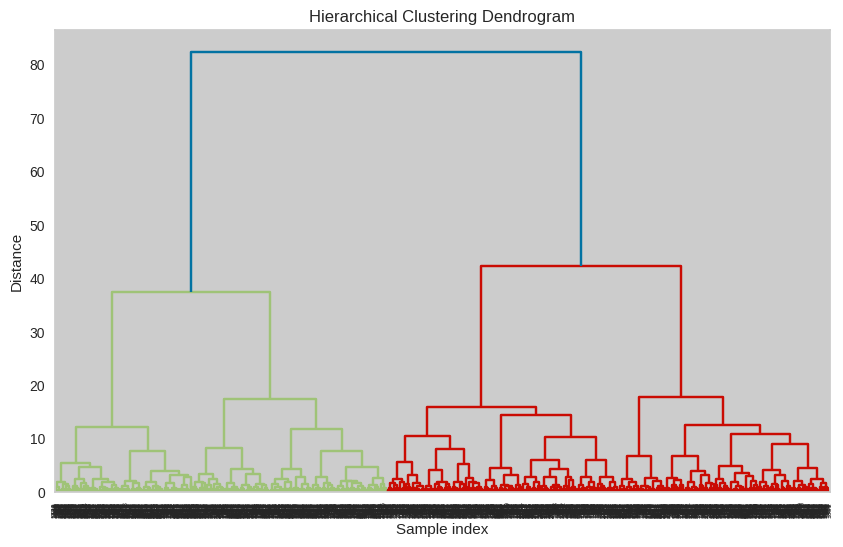

In [64]:
plt.figure(figsize=(10, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
linkage_data = linkage(rfm_data_transform, method='ward')
dendrogram(linkage_data)
plt.show()

**Spectal Clustering**

In [65]:
spectral_cluster = SpectralClustering(n_clusters=4, random_state=42)
clusters = spectral_cluster.fit_predict(rfm_data_transform)

rfm_data["Cluster_Spectral"] = clusters

<ipython-input-65-f768dbcbd400>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
rfm_data.groupby('Cluster_Spectral').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_Spectral':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_Spectral
Cluster_Spectral,,,,
0,25.93,7.38,85.59,522
1,22.10,20.72,1004.75,575
2,72.24,20.67,1028.50,658
3,76.25,7.64,92.31,451


**Gaussian Mixture Model**

In [67]:
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(rfm_data_transform)

rfm_data["Cluster_GMM"] = clusters

<ipython-input-67-eb6e09cdf2fa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
rfm_data.groupby('Cluster_GMM').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_GMM':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_GMM
Cluster_GMM,,,,
0,20.93,20.64,1004.34,547
1,77.28,8.39,116.31,476
2,26.87,7.44,83.18,541
3,70.71,21.03,1076.40,642


**Models Comparison**

In [69]:
silhouette_kmeans = silhouette_score(rfm_data_transform, rfm_data['Cluster_KMeans'])
silhouette_birch = silhouette_score(rfm_data_transform, rfm_data['Cluster_Birch'])
silhouette_hierarchical = silhouette_score(rfm_data_transform, rfm_data['Cluster_Hierarchical'])
silhouette_spectral = silhouette_score(rfm_data_transform, rfm_data['Cluster_Spectral'])
silhouette_gaussian = silhouette_score(rfm_data_transform, rfm_data['Cluster_GMM'])

num_cluster_kmeans = rfm_data['Cluster_KMeans'].nunique()
num_cluster_birch = rfm_data['Cluster_Birch'].nunique()
num_cluster_hierarchical = rfm_data['Cluster_Hierarchical'].nunique()
num_cluster_spectral = rfm_data['Cluster_Spectral'].nunique()
num_cluster_gaussian = rfm_data['Cluster_GMM'].nunique()

silhouette_scores = pd.DataFrame({
    'Model': ['KMeans', 'Birch', 'Hierarchical', 'Spectral', 'Gaussian'],
    'Silhouette Score': [silhouette_kmeans, silhouette_birch, silhouette_hierarchical, silhouette_spectral, silhouette_gaussian],
    'Number of Cluster': [num_cluster_kmeans, num_cluster_birch, num_cluster_hierarchical, num_cluster_spectral, num_cluster_gaussian]
})

silhouette_scores

,Model,Silhouette Score,Number of Cluster
0,KMeans,0.400681,4
1,Birch,0.335072,4
2,Hierarchical,0.380105,4
3,Spectral,0.400213,4
4,Gaussian,0.393911,4


**Visualize clustering methods**

In [70]:
def visualize_3D(df, feature):
    cluster_sizes = df[feature].value_counts().sort_values(ascending=False)

    # Define the color map based on sorted cluster sizes
    color_list = ['blue', 'green', 'orange', 'pink']
    color_map = {cluster: color_list[i] for i, cluster in enumerate(cluster_sizes.index)}

    # Create the 3D scatter plot
    fig = go.Figure()

    for cluster in cluster_sizes.index:
        cluster_data = df[df[feature] == cluster]
        fig.add_trace(go.Scatter3d(
            x=cluster_data['Recency'],
            y=cluster_data['Frequency'],
            z=cluster_data['Monetary'],
            text=cluster_data['ID'],
            mode='markers',
            marker=dict(
                size=10,
                color=color_map[cluster],
                opacity=0.8
            ),
            name=f'Cluster {cluster} ({cluster_sizes[cluster]})'
        ))

    fig.update_layout(scene=dict(
                        xaxis_title='Recency',
                        yaxis_title='Frequency',
                        zaxis_title='Monetary'),
                        title='3D Scatter Plot with Cluster Colors',
                        margin=dict(l=0, r=0, b=0, t=0),
                        width=600,
                        height=600
                        )
    fig.show()

KMeans Visualisation

In [71]:
visualize_3D(rfm_data, 'Cluster_KMeans')

In [72]:
visualize_3D(rfm_data, 'Cluster_Birch')

In [73]:
visualize_3D(rfm_data, 'Cluster_Hierarchical')

In [74]:
visualize_3D(rfm_data, 'Cluster_Spectral')

In [75]:
visualize_3D(rfm_data, 'Cluster_GMM')

The most suitable hyperparameters for KMeans

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will 

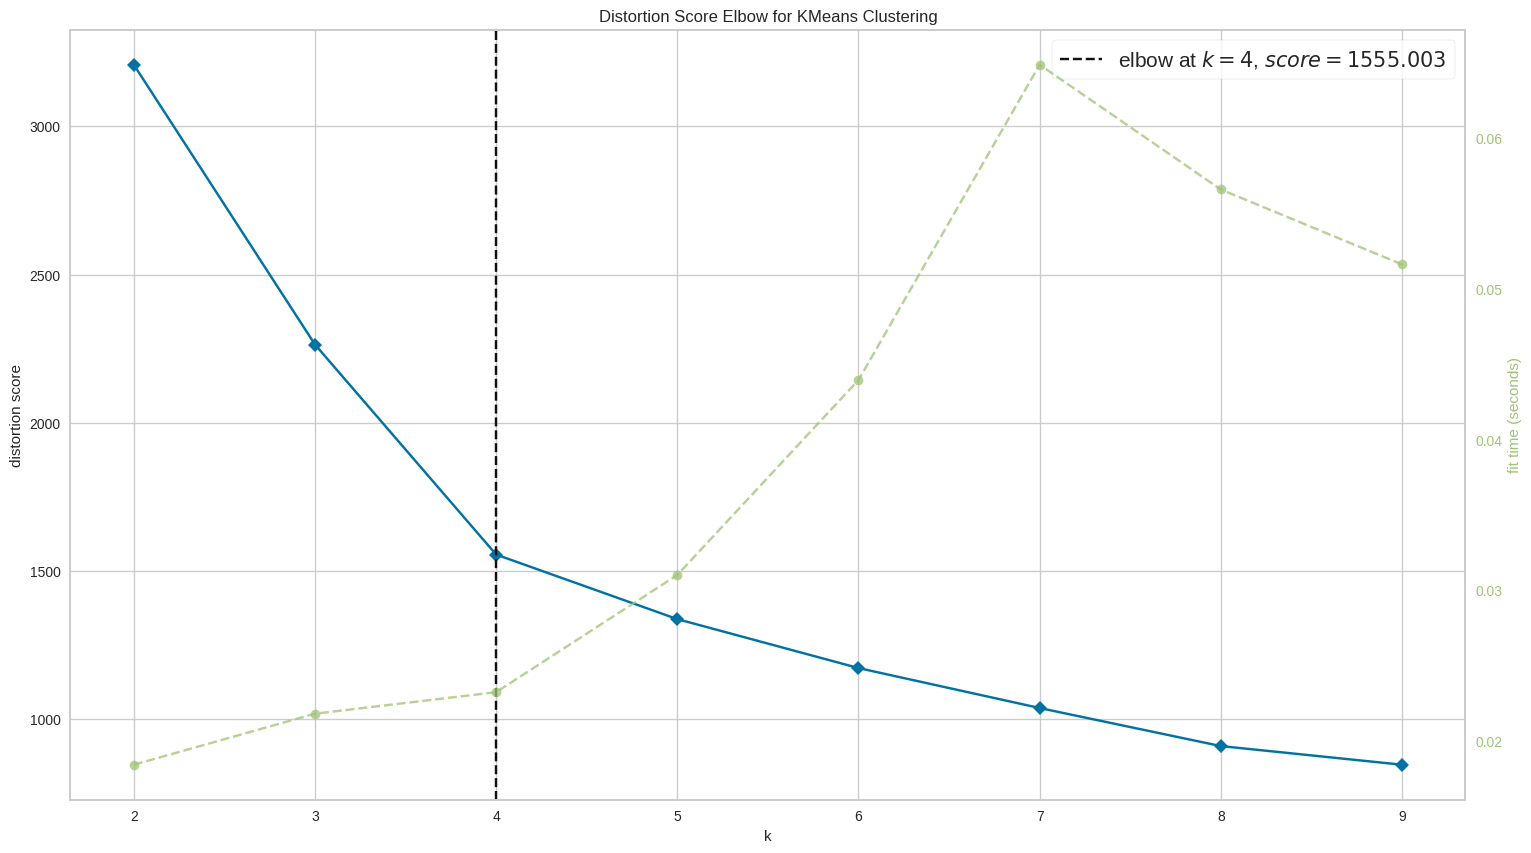

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
k_means = KMeans(random_state=42)
elbow = KElbowVisualizer(k_means, k=(2, 10))
elbow.fit(rfm_data_transform)
elbow.show()

=> choose n_cluster = 4

In [77]:
data['Cluster'] = rfm_data['Cluster_KMeans']
data.head()

,ID,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,...,Gender,Total_Purchase,Payment_Method,Age,Relationship_Status,Num_Of_Child,Age_Group,Total_Spending,Relationship_Child_Group,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
1575,1575,PhD,55158.0,2021-07-30,72.0,294.0,2.0,87.0,4.0,11.0,...,Female,18.0,Mobile,35,Married,2,30-40,421.0,Married - 2 Kids,1
8847,8847,2n Cycle,52203.0,2021-07-31,36.0,489.0,23.0,238.0,56.0,108.0,...,Other,27.0,Cash,38,Together,0,30-40,942.0,Together - 0 Kids,0
2439,2439,Master,82576.0,2021-08-01,66.0,1207.0,57.0,445.0,168.0,18.0,...,Male,19.0,Cash,31,Together,0,30-40,1913.0,Together - 0 Kids,1
3685,3685,Graduation,73803.0,2021-08-01,61.0,834.0,82.0,363.0,52.0,26.0,...,Female,22.0,Card,41,Married,1,40-50,1531.0,Married - 1 Kids,1
9323,9323,Graduation,7500.0,2021-08-01,19.0,8.0,2.0,12.0,13.0,7.0,...,Other,12.0,Not provided,43,Married,1,40-50,74.0,Married - 1 Kids,3


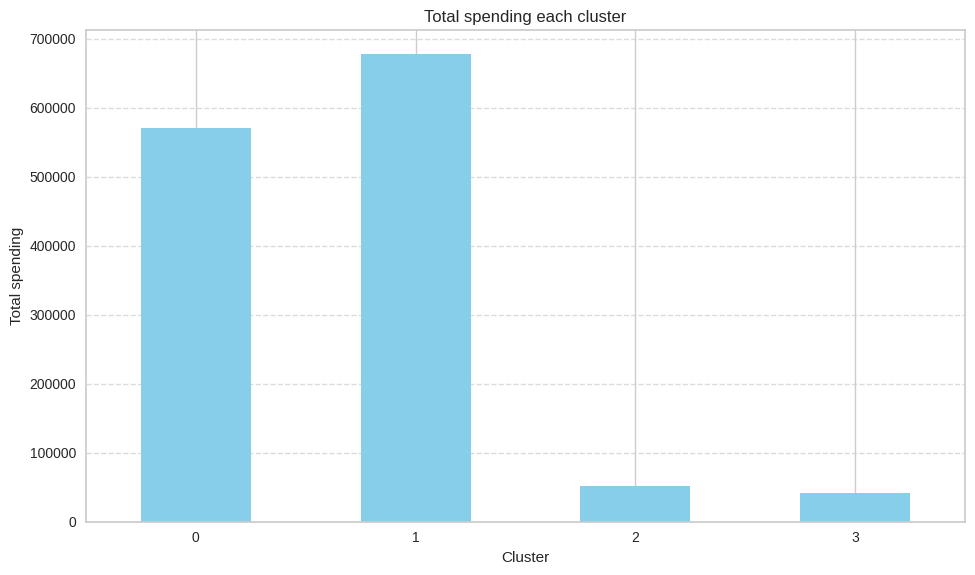

In [78]:
# Sum monetary for each cluster
cluster_totals = data.groupby('Cluster')['Total_Spending'].sum()

plt.figure(figsize=(10, 6))
cluster_totals.plot(kind='bar', color='skyblue')
plt.title('Total spending each cluster')
plt.xlabel('Cluster')
plt.ylabel('Total spending')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

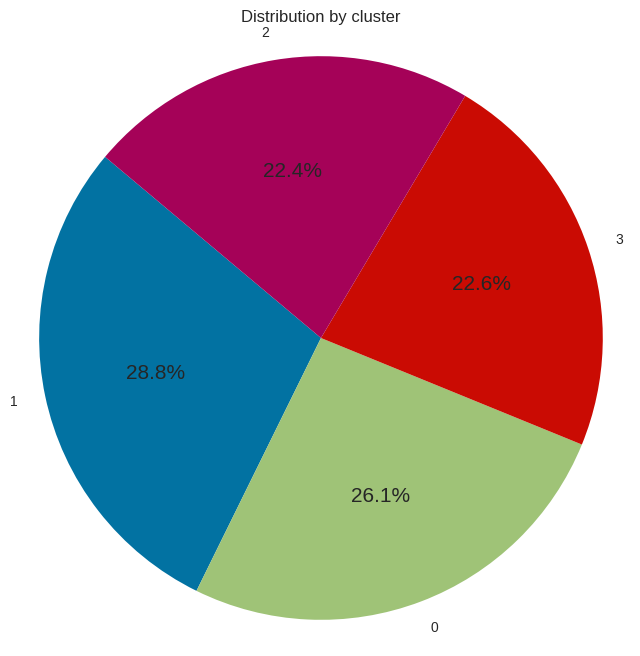

In [79]:
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution by cluster')
plt.axis('equal')
plt.show()

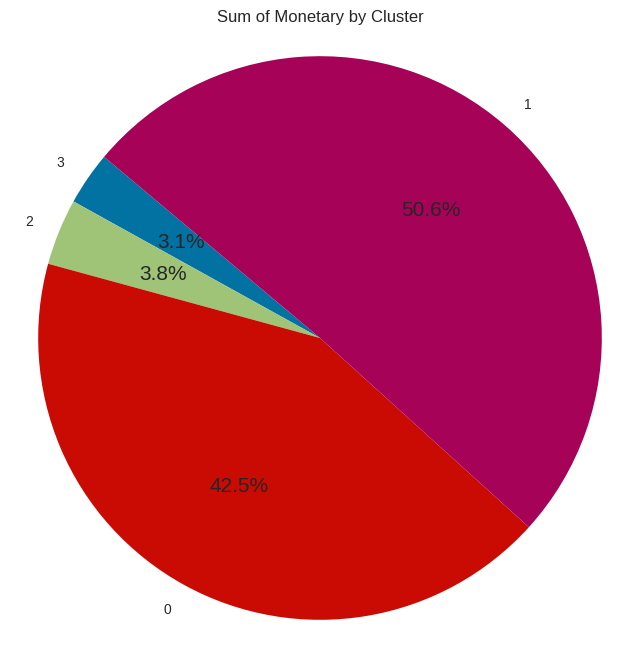

In [80]:
cluster_sum_monetary = data.groupby('Cluster')['Total_Spending'].sum()
cluster_sum_monetary = cluster_sum_monetary.sort_values()
plt.figure(figsize=(8, 8))

plt.pie(cluster_sum_monetary, labels=cluster_sum_monetary.index, autopct='%1.1f%%', startangle=140)

plt.title('Sum of Monetary by Cluster')
plt.axis('equal')
plt.show()

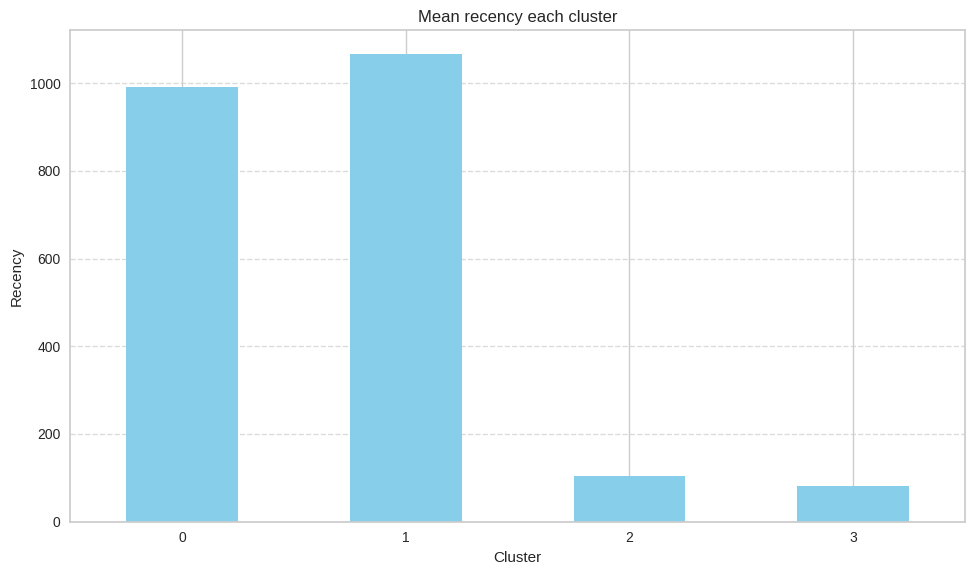

In [81]:
# Mean recency for each cluster
cluster_recency = data.groupby('Cluster')['Total_Spending'].mean()

plt.figure(figsize=(10, 6))
cluster_recency.plot(kind='bar', color='skyblue')
plt.title('Mean recency each cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [82]:
rfm_data.groupby('Cluster_KMeans').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'Cluster_KMeans':'size'
    }
).round(2)

,Recency,Frequency,Monetary,Cluster_KMeans
Cluster_KMeans,,,,
0,22.14,20.59,989.97,576
1,72.07,20.99,1066.77,636
2,75.08,8.07,103.20,495
3,24.86,7.24,82.20,499


In [83]:
top_2_monetary = rfm_data.groupby('Cluster_KMeans')[['Monetary', 'Recency']].mean().nlargest(2, 'Monetary').reset_index()

print(top_2_monetary)

   Cluster_KMeans     Monetary    Recency
0               1  1066.765723  72.072327
1               0   989.973958  22.138889


In [84]:
first_place = top_2_monetary['Cluster_KMeans'][0]
second_place = top_2_monetary['Cluster_KMeans'][1]

print(f"Cluster {first_place} and cluster {second_place} are customers contributing high value to the business.")

Cluster 1 and cluster 0 are customers contributing high value to the business.


In [85]:
best_cluster = top_2_monetary['Cluster_KMeans'][0] if top_2_monetary['Recency'][0] < top_2_monetary['Recency'][1] else top_2_monetary['Cluster_KMeans'][1]
best_cluster_2nd = top_2_monetary['Cluster_KMeans'][0] if top_2_monetary['Recency'][0] > top_2_monetary['Recency'][1] else top_2_monetary['Cluster_KMeans'][1]

print(f"Among the top 2 clusters, cluster {best_cluster} has the best recency value so the cluster {best_cluster} is the best cluster.")
print(f"Cluster {best_cluster_2nd} is the second best cluster.")

Among the top 2 clusters, cluster 0 has the best recency value so the cluster 0 is the best cluster.
Cluster 1 is the second best cluster.
